# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U -q PyDrive
!pip install httplib2==0.15.0
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from pydrive.files import GoogleDriveFileList
from google.colab import auth
from oauth2client.client import GoogleCredentials

from getpass import getpass
import urllib

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Cloning PAL_2021 to access modules.
# Need password to access private repo.

if 'PAL_2021' not in os.listdir():
    cmd_string = 'git clone https://github.com/PAL-ML/CLIPPER.git'
    os.system(cmd_string)

     |████████████████████████████████| 102kB 7.2MB/s 
  Found existing installation: httplib2 0.17.4
    Uninstalling httplib2-0.17.4:
      Successfully uninstalled httplib2-0.17.4
Github User name: ashadhaz
Password: ··········


# Installation

## Install multi label metrics dependencies

In [ ]:
! pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Install CLIP dependencies

In [ ]:
# import subprocess

# CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
# print("CUDA version:", CUDA_version)

# if CUDA_version == "10.0":
#     torch_version_suffix = "+cu100"
# elif CUDA_version == "10.1":
#     torch_version_suffix = "+cu101"
# elif CUDA_version == "10.2":
#     torch_version_suffix = ""
# else:
#     torch_version_suffix = "+cu110"

In [ ]:
# ! pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex

In [ ]:
# ! pip install ftfy regex

In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-8h0qy3px
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-8h0qy3px
     |████████████████████████████████| 71kB 5.6MB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 12.8MB 263kB/s 
  Created wheel for clip: filename=clip-1.0-cp37-none-any.whl size=1368708 sha256=a00ca7844d2da60eeb4f4c02bbe9fe264d8a1d7a256930b7d781d90e287d7345
  Stored in directory: /tmp/pip-ephem-wheel-cache-kt2f20re/wheels/79/51/d7/69f91d37121befe21d9c52332e04f592e17d1cabc7319b3e09
  Created wheel for ftfy: filename=ftfy-6.0.1-cp37-none-any.whl size=41573 sha256=1716c700fadaeb8cd316045569c9ca4a28b32f7b611bea0e6a49b80320252ab2
  Stored in directory: /root/.cache/pip/wheels/ae/73/c7/9056e14b04919e5c262fe80b54133b1a88d73683d05d7ac65c
Successfully built clip ftfy
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Fo

## Install clustering dependencies

In [ ]:
!pip -q install umap-learn>=0.3.7

## Install dataset manager dependencies

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=690b3eb20d57a1121f733aecfa2d5addfbe5f0ea71cd6c443833f0f54bb47f57
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


# Imports

In [ ]:
# ML Libraries
import tensorflow as tf
import tensorflow_hub as hub
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import keras

# Data processing
import PIL
import base64
import imageio
import pandas as pd
import numpy as np
import json

from PIL import Image
import cv2
from sklearn.feature_extraction.image import extract_patches_2d

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from IPython.core.display import display, HTML
from matplotlib import cm
import matplotlib.image as mpimg

# Models
import clip

# Datasets
import tensorflow_datasets as tfds

# Clustering
# import umap

from sklearn import metrics
from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer

# Misc
import progressbar
import logging
from abc import ABC, abstractmethod
import time
import urllib.request
import os
from sklearn.metrics import jaccard_score, hamming_loss, accuracy_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer


# Modules
# from PAL_2021.PAL_HILL.ExperimentModules import embedding_models
from CLIPPER.code.ExperimentModules.dataset_manager import DatasetManager
from CLIPPER.code.ExperimentModules.weight_imprinting_classifier import WeightImprintingClassifier
from CLIPPER.code.ExperimentModules import simclr_data_augmentations
from CLIPPER.code.ExperimentModules.utils import (save_npy, load_npy, 
                                                       get_folder_id, 
                                                       create_expt_dir, 
                                                       save_to_drive, 
                                                       load_all_from_drive_folder, 
                                                       download_file_by_name, 
                                                       delete_file_by_name)

logging.getLogger('googleapicliet.discovery_cache').setLevel(logging.ERROR)

# Initialization & Constants

**Edited**

In [ ]:
dataset_name = 'Coco'
folder_name = "Coco-Embeddings-28-02-21"

# Change parentid to match that of experiments root folder in gdrive
parentid = '1bK72W-Um20EQDEyChNhNJthUNbmoSEjD'

# Filepaths
train_labels_filename = "train_labels.npz"
val_labels_filename = "val_labels.npz"
test_labels_filename = "test_labels.npz"

train_embeddings_filename_suffix = "_embeddings_train.npz"
val_embeddings_filename_suffix = "_embeddings_val.npz"
test_embeddings_filename_suffix = "_embeddings_test.npz"


# Initialize sepcific experiment folder in drive
folderid = create_expt_dir(drive, parentid, folder_name)

title: Coco-Embeddings-28-02-21, id: 11p_iQPU9rMy6SNE_uWeHjRKXyj8LszZb
Experiment folder already exists. WARNING: Following with this run might overwrite existing results stored.


# Load data

In [ ]:
LABEL_PATH = '/content/drive/MyDrive/PAL_HILL_2021/Datasets/Coco2017Train/labels.json'
IMG_PATH = '/content/drive/MyDrive/PAL_HILL_2021/Datasets/Coco2017Train/train2017/'
IMG_LIST_PATH = '/content/drive/MyDrive/PAL_HILL_2021/Datasets/Coco2017Train/img_list.npz'

In [ ]:
def get_ndarray_from_drive(drive, folderid, filename):
    download_file_by_name(drive, folderid, filename)
    return np.load(filename)['data']

# train_labels = get_ndarray_from_drive(drive, folderid, train_labels_filename)
# val_labels = get_ndarray_from_drive(drive, folderid, val_labels_filename)
# test_labels = get_ndarray_from_drive(drive, folderid, test_labels_filename)

In [ ]:
with open(LABEL_PATH) as json_file:
  labels = json.load(json_file)

In [ ]:
img_list = np.load(IMG_LIST_PATH)['data']

In [ ]:
dict_keys = list(labels.keys())

for i in dict_keys:
  name = i.zfill(12)+".jpg"
  if name not in img_list:
    del labels[i]

In [ ]:
dict_keys = list(labels.keys())
dict_keys[2]

'325969'

In [ ]:
#If there is a Google drive timeout error, please run this cell again and then proceed
img = mpimg.imread(IMG_PATH + "325969".zfill(12) + '.jpg')

# Init model (Clip)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 354M/354M [00:04<00:00, 85.8MiB/s]


# Create label dictionary

In [ ]:
unique_labels = range(91)
print(len(unique_labels))

91


In [ ]:
label_dictionary = {la:[] for la in unique_labels}
dict_keys = list(labels)
for i in dict_keys:
    for patch in labels[i]:
      label_dictionary[patch['category_id']].append(i)

# Weight Imprinting models on train data embeddings

## Function definitions

In [ ]:
def generate_patch_list(indices, episode):
  patches_res = []
  for i in indices:
    img = mpimg.imread(IMG_PATH + i.zfill(12) + '.jpg')
    # fig, ax = plt.subplots()
    # ax.imshow(img)
    for j in labels[i]:
      if j['category_id'] in selected_labels_per_episode[episode]:
        x = int(j['bbox'][0])
        x1 = int(j['bbox'][0] + j['bbox'][2])
        y = int(j['bbox'][1])
        y1 = int(j['bbox'][1] + j['bbox'][3])
        # rect = patches.Rectangle((j['bbox'][0], j['bbox'][1]), j['bbox'][2], j['bbox'][3], linewidth=1, edgecolor='r', facecolor='none')
        # ax.add_patch(rect)
        patches_res.append(img[y:y1, x:x1, :])
  return patches_res

In [ ]:
def encode_patch(patches):
  embeddings = []
  for p in patches:
    # print(img.shape)
    pil_img = Image.fromarray(p)
    preproc_img = preprocess(pil_img).unsqueeze(0).to(device)
    with torch.no_grad():
      _emb = model.encode_image(preproc_img)  
    embeddings.append(_emb.cpu().detach().numpy()[0])
    del _emb
    del pil_img
    del preproc_img
    #embeddings.append(np.array(emb_per_img))
    #del emb_per_img
  return np.array(embeddings)

In [ ]:
# for full images we just need the index of the image eg '34'
def encode_full_img(indices):
  embeddings = []
  for i in indices:
    img = mpimg.imread(IMG_PATH + i.zfill(12) + '.jpg')
    pil_img = Image.fromarray(img)
    preproc_img = preprocess(pil_img).unsqueeze(0).to(device)
    with torch.no_grad():
      _emb = model.encode_image(preproc_img)  
    embeddings.append(_emb.cpu().detach().numpy()[0])
    del _emb
    del pil_img
    del preproc_img
    #embeddings.append(np.array(emb_per_img))
    #del emb_per_img
  return np.array(embeddings)



In [ ]:
def encode_aug_img(images):
  images *= 255
  images = images.astype('uint8')
  embeddings = []
  for img in images:
    pil_img = Image.fromarray(img.astype('uint8'))
    preproc_img = preprocess(pil_img).unsqueeze(0).to(device)
    with torch.no_grad():
      _emb = model.encode_image(preproc_img)  
    embeddings.append(_emb.cpu().detach().numpy()[0])
    del _emb
    del pil_img
    del preproc_img
  #embeddings.append(np.array(emb_per_img))
    #del emb_per_img
  return np.array(embeddings)

In [ ]:
def start_progress_bar(bar_len):
    widgets = [
        ' [', 
        progressbar.Timer(format= 'elapsed time: %(elapsed)s'), 
        '] ', 
        progressbar.Bar('*'),' (', 
        progressbar.ETA(), ') ', 
        ]
    pbar = progressbar.ProgressBar(
        max_value=bar_len, widgets=widgets
        ).start()
    return pbar

In [ ]:
def run_train_loop( 
    train_indices, 
    eval_indices, 
    wi_y, 
    eval_y, 
    num_episodes, 
    num_ways,
    verbose=True,
    normalize=True,
    train_epochs_loop=[5],
    train_batch_size=5,
    metrics=['hamming', 'jaccard', 'subset_accuracy', 'ap', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'classwise_accuracy', 'c_accuracy'],
    threshold=0.72
):
    metrics_values = [{m:[] for m in metrics} for _ in range(len(train_epochs_loop)+1)]

    if verbose:
        pbar = start_progress_bar(num_episodes)

    all_logits = []   #cc

    for idx_ep in range(num_episodes):
        wi_x = train_emb_reshaped[idx_ep]
        eval_x = eval_emb_per_episode[idx_ep]

        ep_logits = []  #cc

        _wi_y = wi_y[idx_ep]
        wi_y_ = []
        for i in range(len(_wi_y)):
          for j in range(num_augmentations+1):
            wi_y_.append(_wi_y[i])
        
        if normalize:
            wi_x = WeightImprintingClassifier.preprocess_input(wi_x)
            eval_x = WeightImprintingClassifier.preprocess_input(eval_x)

        wi_weights, label_mapping = WeightImprintingClassifier.get_imprinting_weights(
            wi_x, wi_y_, False, True
            )

        wi_parameters = {
            "num_classes": num_ways,
            "input_dims": wi_x.shape[-1],
            "scale": False,
            "dense_layer_weights": wi_weights,
            "multi_label": True
        }

        wi_cls = WeightImprintingClassifier(wi_parameters)

        met = wi_cls.evaluate_multi_label_metrics(
            eval_x, eval_y[idx_ep], label_mapping, threshold, metrics
            )
        for m in met:
            metrics_values[0][m].append(met[m])
        

        for idx_tr_ep in range(len(train_epochs_loop)):
            ep_y = wi_y_
            rev_label_mapping = {label_mapping[val]:val for val in label_mapping}
            train_y = np.zeros((len(ep_y), num_ways))
            for idx_y, _y in enumerate(ep_y):
                for l in _y:
                    train_y[idx_y, rev_label_mapping[l]] = 1


            wi_cls.train(wi_x, train_y, train_epochs_loop[idx_tr_ep], train_batch_size)

            logits = wi_cls.predict_scores(eval_x).tolist()  #cc
            ep_logits.append(logits)  #cc

            met = wi_cls.evaluate_multi_label_metrics(
                eval_x, eval_y[idx_ep], label_mapping, threshold, metrics
                )
            for m in met:
                metrics_values[idx_tr_ep+1][m].append(met[m])

        all_logits.append(ep_logits)  #cc
        # _pred_y = wi_cls.predict_multi_label(eval_x, threshold)
        # for j in range(len(_eval_y)):
        #     print([label_mapping[p] for p in _pred_y[j]], " vs ", _eval_y[j])

        # met = wi_cls.evaluate_multi_label_metrics(
        #     eval_x, eval_y[idx_ep], label_mapping, threshold, metrics
        #     )
        
        # for m in met:
        #     metrics_values[m].append(met[m])

        del wi_x
        del eval_x
        del wi_cls

        if verbose:
            pbar.update(idx_ep+1)

    return metrics_values, all_logits #cc

In [ ]:
def get_max_mean_jaccard_index_by_threshold(metrics_thresholds):
    max_mean_jaccard = np.max([np.mean(mt['jaccard']) for mt in metrics_thresholds])
    return max_mean_jaccard

In [ ]:
def get_max_mean_jaccard_index_with_threshold(metrics_thresholds):
    max_mean_jaccard = np.max([np.mean(mt['jaccard']) for mt in metrics_thresholds])
    threshold = np.argmax([np.mean(mt['jaccard']) for mt in metrics_thresholds])
    return max_mean_jaccard, threshold

In [ ]:
def get_max_mean_f1_score_with_threshold(metrics_thresholds):
    max_mean_jaccard = np.max([np.mean(mt['o_f1']) for mt in metrics_thresholds])
    threshold = np.argmax([np.mean(mt['o_f1']) for mt in metrics_thresholds])
    return max_mean_jaccard, threshold

In [ ]:
def get_mean_max_jaccard_index_by_episode(metrics_thresholds):
    mean_max_jaccard = np.mean(np.max(np.array([mt['jaccard'] for mt in metrics_thresholds]), axis=0))
    return mean_max_jaccard

In [ ]:
def embed_augmented_imgs(image, num_augmentations, trivial=False):
  if np.max(image) > 1:
    image = image/255
    
  def augment_image(image, num_augmentations, trivial=False):
      """ Perform SimCLR augmentations on the image
      """

      augmented_images = [image]

      def _run_filters(image):
          width = image.shape[1]
          height = image.shape[0]
          image_aug = simclr_data_augmentations.random_crop_with_resize(
              image,
              height,
              width
              )
          image_aug = tf.image.random_flip_left_right(image_aug)
          image_aug = simclr_data_augmentations.random_color_jitter(image_aug)
          image_aug = simclr_data_augmentations.random_blur(
              image_aug,
              height,
              width
              )
          image_aug = tf.reshape(image_aug, [image.shape[0], image.shape[1], 3])
          image_aug = tf.clip_by_value(image_aug, 0., 1.)

          return image_aug.numpy()

      for _ in range(num_augmentations):
          # aug_image = augmentations(image=image)
          if trivial:
              aug_image = image
          else:
              try:
                aug_image = _run_filters(image)
              except:
                stacked_img = np.stack((image,)*3, axis=-1)
                plt.imshow(stacked_img)
                augmented_images = [stacked_img]
                aug_image = _run_filters(stacked_img)
                print(stacked_img.shape)
                print(aug_image.shape)
                # for i in aug_image:
                #   plt.imshow(i)
                #   plt.show()

          augmented_images.append(aug_image)

      augmented_images = np.stack(augmented_images)
      return augmented_images

  if num_augmentations > 0:
      aug_images = augment_image(image, num_augmentations, trivial)
  else:
      aug_images = np.array([image])

  embeddings = encode_aug_img(aug_images)
  return embeddings

In [ ]:
 #cc whole block
def save_results(num_ways, num_shots, num_aug, trivial, clip_metrics_thresholds, logits_thresholds):
  if trivial:
  #cc
    results_filename = "new_metrics"+dataset_name+ "_Full_Full" +"_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_trivial_metrics_with_logits.json"
  else:
    #cc
    results_filename = "new_metrics"+dataset_name+ "_Full_Full" + "_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_metrics_with_logits.json"

  with open(results_filename, 'w') as f:
    #cc
    results = {'metrics': clip_metrics_thresholds,
                "logits": logits_thresholds,
                }
    json.dump(results, f)
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  delete_file_by_name(drive, folderid, results_filename)
  save_to_drive(drive, folderid, results_filename)

In [ ]:
# chenni change whole block
def get_best_metric_and_threshold(metrics_thresholds, metric_name, thresholds, optimal='max'):
    if optimal=='max':
        opt_value = np.max([np.mean(mt[metric_name]) for mt in metrics_thresholds])
        opt_threshold = thresholds[np.argmax([np.mean(mt[metric_name]) for mt in metrics_thresholds])]
    if optimal=='min':
        opt_value = np.min([np.mean(mt[metric_name]) for mt in metrics_thresholds])
        opt_threshold = thresholds[np.argmin([np.mean(mt[metric_name]) for mt in metrics_thresholds])]

    return opt_value, opt_threshold

In [ ]:
def save_trends(num_ways, num_shot, num_augmentations, trivial, clip_metrics_thresholds, logits_thresholds):
  # chenni change whole block
  all_metrics = ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']

  f1_vals = []
  f1_t_vals = []
  jaccard_vals = []
  jaccard_t_vals = []

  final_dict = {}
  for ind_metric in all_metrics:
    vals = []
    t_vals = []
    final_array = []
    for mt in clip_metrics_thresholds:
      if ind_metric == "hamming":
        ret_val, ret_t_val = get_best_metric_and_threshold(mt,ind_metric,thresholds,"min")
      else:
        ret_val, ret_t_val = get_best_metric_and_threshold(mt,ind_metric,thresholds,"max")
      vals.append(ret_val)
      t_vals.append(ret_t_val)

    final_array.append(vals)
    final_array.append(t_vals)
    final_dict[ind_metric] = final_array

  if trivial:
      graph_filename = "new_metrics"+dataset_name+ "_Full_Full"+"_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_trivial_metrics_graphs.json"
  else:
      graph_filename = "new_metrics"+dataset_name+ "_Full_Full"+"_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_metrics_graphs.json"

  with open(graph_filename, 'w') as f:
          json.dump(final_dict, f)

  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  delete_file_by_name(drive, folderid, graph_filename)
  save_to_drive(drive, folderid, graph_filename)

## Setting multiple thresholds

In [ ]:
thresholds = np.arange(0.4, 0.72, 0.01)
thresholds

array([0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61,
       0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71])

In [ ]:
def plot_metrics_by_threshold(
    metrics_thresholds, 
    thresholds, 
    metrics=['hamming', 'jaccard', 'subset_accuracy', 'ap', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'classwise_accuracy', 'c_accuracy'],
    title_suffix=""
):
    legend = []
    fig = plt.figure(figsize=(7,7))
    plt.grid(True)

    if 'jaccard' in metrics:
        mean_jaccard_threshold = [np.mean(mt['jaccard']) for mt in metrics_thresholds]
        opt_threshold_jaccard = thresholds[np.argmax(mean_jaccard_threshold)]
        plt.plot(thresholds, mean_jaccard_threshold, c='blue')
        plt.axvline(opt_threshold_jaccard, ls="--", c='blue')
        legend.append("Jaccard Index")
        legend.append(opt_threshold_jaccard)
    if 'hamming' in metrics:
        mean_hamming_threshold = [np.mean(mt['hamming']) for mt in metrics_thresholds]
        opt_threshold_hamming = thresholds[np.argmin(mean_hamming_threshold)]
        plt.plot(thresholds, mean_hamming_threshold, c='green')
        plt.axvline(opt_threshold_hamming, ls="--", c='green')
        legend.append("Hamming Score")
        legend.append(opt_threshold_hamming)
    if 'map' in metrics:
        mean_hamming_threshold = [np.mean(mt['map']) for mt in metrics_thresholds]
        opt_threshold_hamming = thresholds[np.argmin(mean_hamming_threshold)]
        plt.plot(thresholds, mean_hamming_threshold, c='red')
        plt.axvline(opt_threshold_hamming, ls="--", c='red')
        legend.append("mAP Score")
        legend.append(opt_threshold_hamming)
    if 'o_f1' in metrics:
        mean_hamming_threshold = [np.mean(mt['o_f1']) for mt in metrics_thresholds]
        opt_threshold_hamming = thresholds[np.argmin(mean_hamming_threshold)]
        plt.plot(thresholds, mean_hamming_threshold, c='yellow')
        plt.axvline(opt_threshold_hamming, ls="--", c='yellow')
        legend.append("OF1")
        legend.append(opt_threshold_hamming)
    if 'c_f1' in metrics:
        mean_hamming_threshold = [np.mean(mt['c_f1']) for mt in metrics_thresholds]
        opt_threshold_hamming = thresholds[np.argmin(mean_hamming_threshold)]
        plt.plot(thresholds, mean_hamming_threshold, c='orange')
        plt.axvline(opt_threshold_hamming, ls="--", c='orange')
        legend.append("CF1")
        legend.append(opt_threshold_hamming)
    if 'o_precision' in metrics:
        mean_hamming_threshold = [np.mean(mt['o_precision']) for mt in metrics_thresholds]
        opt_threshold_hamming = thresholds[np.argmin(mean_hamming_threshold)]
        plt.plot(thresholds, mean_hamming_threshold, c='purple')
        plt.axvline(opt_threshold_hamming, ls="--", c='purple')
        legend.append("OP")
        legend.append(opt_threshold_hamming)
    if 'c_precision' in metrics:
        mean_hamming_threshold = [np.mean(mt['c_precision']) for mt in metrics_thresholds]
        opt_threshold_hamming = thresholds[np.argmin(mean_hamming_threshold)]
        plt.plot(thresholds, mean_hamming_threshold, c='cyan')
        plt.axvline(opt_threshold_hamming, ls="--", c='cyan')
        legend.append("CP")
        legend.append(opt_threshold_hamming)
    if 'o_recall' in metrics:
        mean_hamming_threshold = [np.mean(mt['o_recall']) for mt in metrics_thresholds]
        opt_threshold_hamming = thresholds[np.argmin(mean_hamming_threshold)]
        plt.plot(thresholds, mean_hamming_threshold, c='brown')
        plt.axvline(opt_threshold_hamming, ls="--", c='brown')
        legend.append("OR")
        legend.append(opt_threshold_hamming)
    if 'c_precision' in metrics:
        mean_hamming_threshold = [np.mean(mt['c_precision']) for mt in metrics_thresholds]
        opt_threshold_hamming = thresholds[np.argmin(mean_hamming_threshold)]
        plt.plot(thresholds, mean_hamming_threshold, c='pink')
        plt.axvline(opt_threshold_hamming, ls="--", c='pink')
        legend.append("CR")
        legend.append(opt_threshold_hamming)
    if 'c_accuracy' in metrics:
        mean_hamming_threshold = [np.mean(mt['c_accuracy']) for mt in metrics_thresholds]
        opt_threshold_hamming = thresholds[np.argmin(mean_hamming_threshold)]
        plt.plot(thresholds, mean_hamming_threshold, c='maroon')
        plt.axvline(opt_threshold_hamming, ls="--", c='maroon')
        legend.append("CACC")
        legend.append(opt_threshold_hamming)
    
    
    
    plt.xlabel('Threshold')
    plt.ylabel('Value')
    plt.legend(legend)
    plt.title(title_suffix+" Multi label metrics by threshold")
    plt.show()
   

# 5 way 5 shot

## Picking indices

In [ ]:
num_ways = 5
num_shot = 5
num_eval = 5
eval_indices = []
train_indices = []
wi_y = []
eval_y = []
shuffle = False
sort = True
num_episodes = 10
selected_labels_per_episode = []

label_dictionary = {la:label_dictionary[la] for la in label_dictionary if len(label_dictionary[la]) >= (num_shot+num_eval)}
unique_labels = list(label_dictionary.keys())

pbar = start_progress_bar(num_episodes)

for s in range(num_episodes):
    # Setting random seed for replicability
    np.random.seed(s)

    _train_indices = []
    _eval_indices = []

    selected_labels = np.random.choice(unique_labels, size=num_ways, replace=False)
    selected_labels_per_episode.append(selected_labels)
    for la in selected_labels:
        la_indices = label_dictionary[la]
        # select = np.random.choice(la_indices, size = num_shot+num_eval, replace=False)
        # tr_idx = list(select[:num_shot])
        # ev_idx = list(select[num_shot:])

        tr_idx = []
        ev_idx = []
        while len(tr_idx) < num_shot:
            idx = np.random.choice(la_indices)
            img = mpimg.imread(IMG_PATH + idx.zfill(12) + '.jpg')
            if img.ndim != 3:
              continue
            if idx not in _train_indices and idx not in _eval_indices and idx not in tr_idx:
                tr_idx.append(idx)
        while len(ev_idx) < num_eval:
            idx = np.random.choice(la_indices)
            img = mpimg.imread(IMG_PATH + idx.zfill(12) + '.jpg')
            if img.ndim != 3:
              continue
            if idx not in _train_indices and idx not in _eval_indices and idx not in tr_idx and idx not in ev_idx:
                ev_idx.append(idx)

        _train_indices = _train_indices + tr_idx
        _eval_indices = _eval_indices + ev_idx

    if shuffle:
        np.random.shuffle(_train_indices)
        np.random.shuffle(_eval_indices)

    # if sort:
    #   _train_indices.sort()
    #   _eval_indices.sort()

    train_indices.append(_train_indices)
    eval_indices.append(_eval_indices)

    _wi_y = []
    for idx in _train_indices:
        la = labels[idx]
        _pa = set()
        for patch in la:
          if patch['category_id'] in selected_labels:
            _pa.add(patch['category_id'])
        _wi_y.append(list(_pa))
        del _pa

    _eval_y = []
    for idx in _eval_indices:
        la = labels[idx]
        _p = set()
        for patch in la:
          if patch['category_id'] in selected_labels:
            _p.add(patch['category_id'])
        _eval_y.append(list(_p))
        del _p

    wi_y.append(_wi_y)
    eval_y.append(_eval_y)

    pbar.update(s+1)

 [elapsed time: 0:04:20] |**********************************| (ETA:  00:00:00) 

In [ ]:
eval_emb_per_episode = []
pbar = start_progress_bar(num_episodes)
for i in range(num_episodes):
  emb = encode_full_img(eval_indices[i])
  eval_emb_per_episode.append(emb)
  del emb
  pbar.update(i+1)

 [elapsed time: 0:00:19] |**********************************| (ETA:  00:00:00) 

## CLIP

###0 augmentations

In [ ]:
num_augmentations = 0
Trivial = False
train_emb_per_episode = []
pbar = start_progress_bar(num_episodes)
for i in range(num_episodes):
  emb_per_img = []
  for j in train_indices[i]:
    img = mpimg.imread(IMG_PATH + j.zfill(12) + '.jpg')
    emb = embed_augmented_imgs(img, num_augmentations, trivial=Trivial)
    emb_per_img.append(emb)
  train_emb_per_episode.append(np.array(emb_per_img))
  del emb_per_img
  del emb
  pbar.update(i+1)

 [elapsed time: 0:00:19] |**********************************| (ETA:  00:00:00) 

In [ ]:
train_emb_reshaped = []
for i in range(num_episodes):
  train_emb_reshaped.append(train_emb_per_episode[i].reshape(train_emb_per_episode[i].shape[0]*train_emb_per_episode[i].shape[1], 512))

In [ ]:
train_epochs_loop = [5 for _ in range(16)]
logits_thresholds = []    #cc
clip_metrics_thresholds = []

pbar = start_progress_bar(len(thresholds))
for i, t in enumerate(thresholds):
    clip_metrics_t,all_logits = run_train_loop(#cc
        train_indices,
        eval_indices,
        wi_y,
        eval_y,
        num_episodes,
        num_ways,
        threshold=t,
        verbose=False,
        train_epochs_loop=train_epochs_loop
    )
    clip_metrics_thresholds.append(clip_metrics_t)
    logits_thresholds.append(all_logits)#cc
    pbar.update(i+1)

 [elapsed time: 0:22:24] |**********************************| (ETA:  00:00:00) 

In [ ]:
save_results(num_ways, num_shot, num_augmentations, Trivial, clip_metrics_thresholds, logits_thresholds)
save_trends(num_ways, num_shot, num_augmentations, Trivial, clip_metrics_thresholds, logits_thresholds)

Uploaded new_metricsCoco_Full_Full_5w5s0a_metrics_with_logits.json to https://drive.google.com/drive/u/1/folders/11p_iQPU9rMy6SNE_uWeHjRKXyj8LszZb
Uploaded new_metricsCoco_Full_Full_5w5s0a_metrics_graphs.json to https://drive.google.com/drive/u/1/folders/11p_iQPU9rMy6SNE_uWeHjRKXyj8LszZb


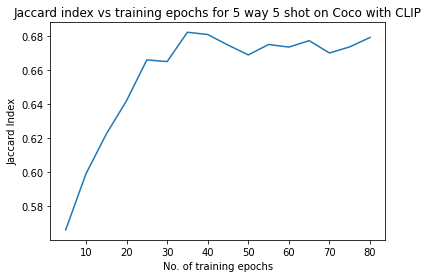

In [ ]:
max_mean_vals = []
threshold_vals = []
x_vals = [np.sum(train_epochs_loop[:i+1]) for i in range(len(train_epochs_loop))]
for idx_tr_ep in range(len(train_epochs_loop)):
  mt = []
  for idx_t in range(len(clip_metrics_thresholds)):
    mt.append(clip_metrics_thresholds[idx_t][idx_tr_ep])

  mmv, t = get_max_mean_jaccard_index_with_threshold(mt)
  max_mean_vals.append(mmv)
  threshold_vals.append(thresholds[t])

plt.plot(x_vals, max_mean_vals)
plt.title("Jaccard index vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("Jaccard Index")
# plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

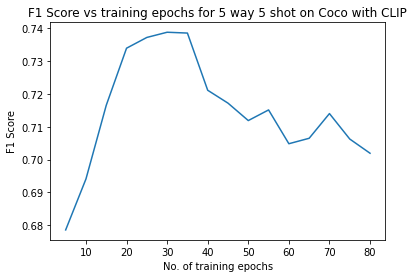

Best f1 score = 0.7388123237949622 at epoch = 30


In [ ]:
max_mean_vals = []
threshold_vals = []
x_vals = [np.sum(train_epochs_loop[:i+1]) for i in range(len(train_epochs_loop))]
for idx_tr_ep in range(len(train_epochs_loop)):
  mt = []
  for idx_t in range(len(clip_metrics_thresholds)):
    mt.append(clip_metrics_thresholds[idx_t][idx_tr_ep])

  mmv, t = get_max_mean_f1_score_with_threshold(mt)
  max_mean_vals.append(mmv)
  threshold_vals.append(thresholds[t])

plt.plot(x_vals, max_mean_vals)
plt.title("F1 Score vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("F1 Score")
# plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

print("Best f1 score = {} at epoch = {}".format(max(max_mean_vals), x_vals[np.argmax(max_mean_vals)]))

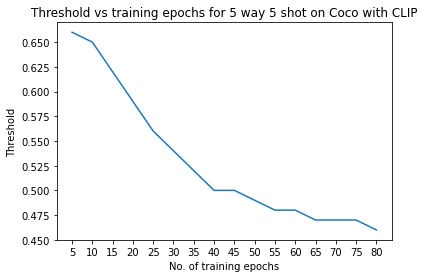

In [ ]:
plt.plot(x_vals, threshold_vals)
plt.title("Threshold vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("Threshold")
plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

###With 5 simclr augmentations trivial=False

In [ ]:
num_augmentations = 5
Trivial = False
train_emb_per_episode = []
pbar = start_progress_bar(num_episodes)
for i in range(num_episodes):
  emb_per_img = []
  for j in train_indices[i]:
    img = mpimg.imread(IMG_PATH + j.zfill(12) + '.jpg')
    emb = embed_augmented_imgs(img, num_augmentations, trivial=Trivial)
    emb_per_img.append(emb)
  train_emb_per_episode.append(np.array(emb_per_img))
  del emb_per_img
  del emb
  pbar.update(i+1)

 [elapsed time: 0:00:00] |                                  | (ETA:  --:--:--) 

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.cast` instead.


 [elapsed time: 0:01:47] |**********************************| (ETA:  00:00:00) 

In [ ]:
train_emb_reshaped = []
for i in range(num_episodes):
  train_emb_reshaped.append(train_emb_per_episode[i].reshape(train_emb_per_episode[i].shape[0]*train_emb_per_episode[i][0].shape[0], 512))

In [ ]:
train_epochs_loop = [5 for _ in range(16)]
logits_thresholds = []    #cc
clip_metrics_thresholds = []

pbar = start_progress_bar(len(thresholds))
for i, t in enumerate(thresholds):
    clip_metrics_t,all_logits = run_train_loop(#cc
        train_indices,
        eval_indices,
        wi_y,
        eval_y,
        num_episodes,
        num_ways,
        threshold=t,
        verbose=False,
        train_epochs_loop=train_epochs_loop
    )
    clip_metrics_thresholds.append(clip_metrics_t)
    logits_thresholds.append(all_logits)#cc
    pbar.update(i+1)

 [elapsed time: 0:36:34] |**********************************| (ETA:  00:00:00) 

In [ ]:
save_results(num_ways, num_shot, num_augmentations, Trivial, clip_metrics_thresholds, logits_thresholds)
save_trends(num_ways, num_shot, num_augmentations, Trivial, clip_metrics_thresholds, logits_thresholds)

Deleting new_metricsCoco_5w5s5a_metrics_with_logits.json from GDrive
Uploaded new_metricsCoco_5w5s5a_metrics_with_logits.json to https://drive.google.com/drive/u/1/folders/11p_iQPU9rMy6SNE_uWeHjRKXyj8LszZb
Deleting new_metricsCoco_Full_Full_5w5s5a_metrics_graphs.json from GDrive
Uploaded new_metricsCoco_Full_Full_5w5s5a_metrics_graphs.json to https://drive.google.com/drive/u/1/folders/11p_iQPU9rMy6SNE_uWeHjRKXyj8LszZb


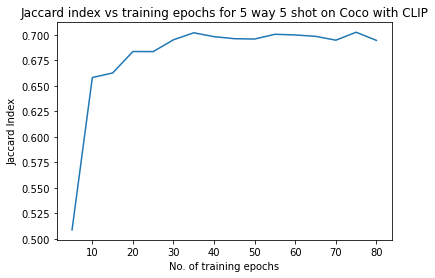

In [ ]:
max_mean_vals = []
threshold_vals = []
x_vals = [np.sum(train_epochs_loop[:i+1]) for i in range(len(train_epochs_loop))]
for idx_tr_ep in range(len(train_epochs_loop)):
  mt = []
  for idx_t in range(len(clip_metrics_thresholds)):
    mt.append(clip_metrics_thresholds[idx_t][idx_tr_ep])

  mmv, t = get_max_mean_jaccard_index_with_threshold(mt)
  max_mean_vals.append(mmv)
  threshold_vals.append(thresholds[t])

plt.plot(x_vals, max_mean_vals)
plt.title("Jaccard index vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("Jaccard Index")
# plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

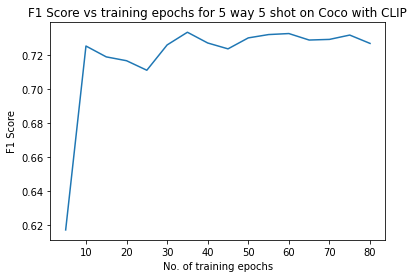

Best f1 score = 0.7335048059620786 at epoch = 35


In [ ]:
max_mean_vals = []
threshold_vals = []
x_vals = [np.sum(train_epochs_loop[:i+1]) for i in range(len(train_epochs_loop))]
for idx_tr_ep in range(len(train_epochs_loop)):
  mt = []
  for idx_t in range(len(clip_metrics_thresholds)):
    mt.append(clip_metrics_thresholds[idx_t][idx_tr_ep])

  mmv, t = get_max_mean_f1_score_with_threshold(mt)
  max_mean_vals.append(mmv)
  threshold_vals.append(thresholds[t])

plt.plot(x_vals, max_mean_vals)
plt.title("F1 Score vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("F1 Score")
# plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

print("Best f1 score = {} at epoch = {}".format(max(max_mean_vals), x_vals[np.argmax(max_mean_vals)]))

In [ ]:
print("Best f1 score = {} at epoch = {}".format(max(max_mean_vals), x_vals[np.argmax(max_mean_vals)]))

Best f1 score = 0.7335048059620786 at epoch = 35


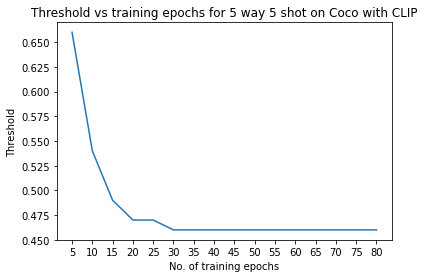

In [ ]:
plt.plot(x_vals, threshold_vals)
plt.title("Threshold vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("Threshold")
plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

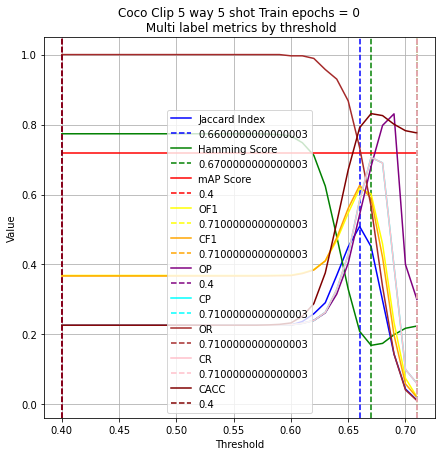

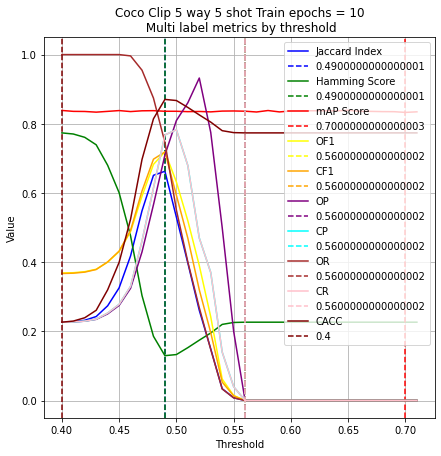

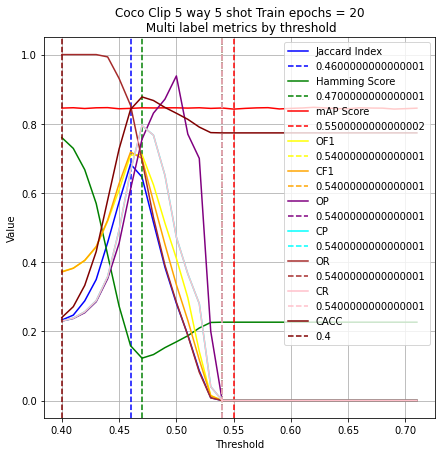

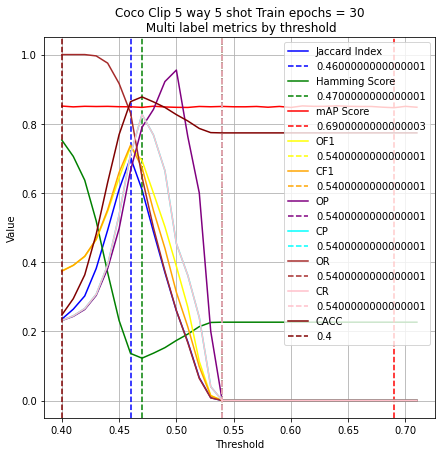

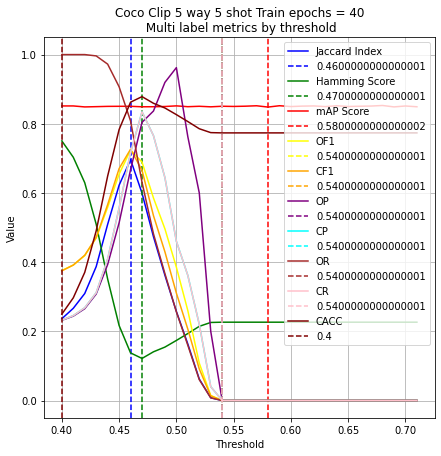

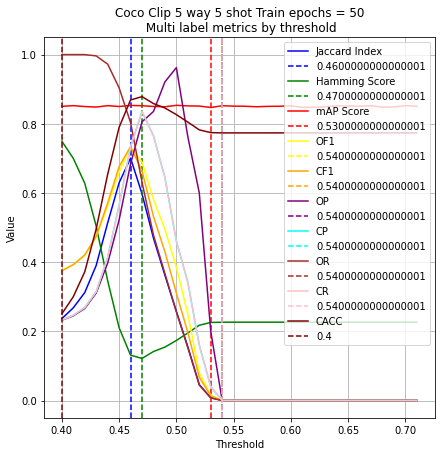

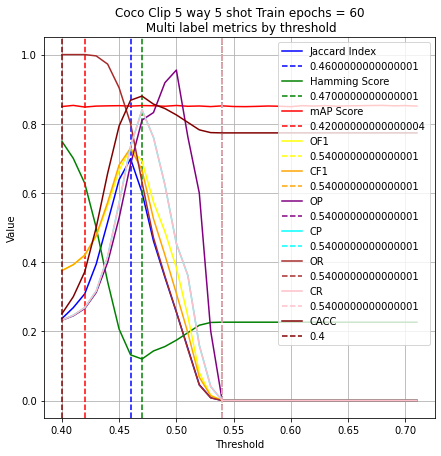

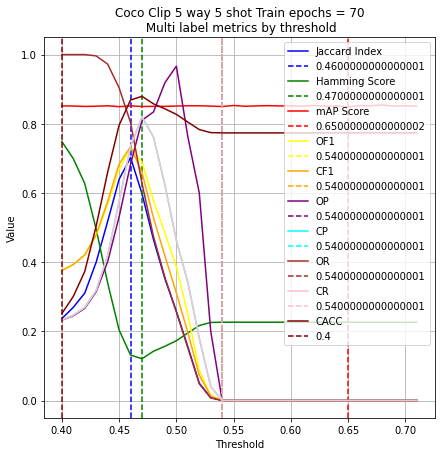

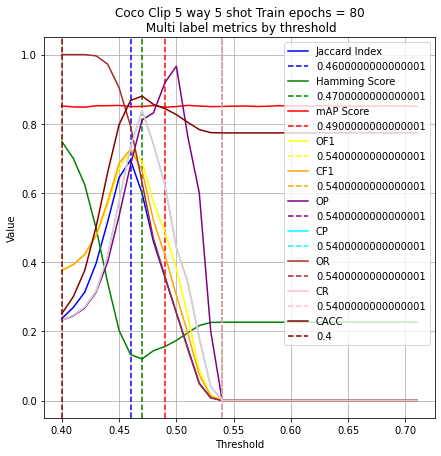

In [ ]:
for i in range(0, 17, 2):
  plot_metrics_by_threshold([cmt[i] for cmt in clip_metrics_thresholds], thresholds, title_suffix=dataset_name + " Clip {} way {} shot Train epochs = {}\n".format(num_ways, num_shot, i*5))

###With 5 trivial augmentations

In [ ]:
num_augmentations = 5
Trivial = True
train_emb_per_episode = []
pbar = start_progress_bar(num_episodes)
for i in range(num_episodes):
  emb_per_img = []
  for j in train_indices[i]:
    img = mpimg.imread(IMG_PATH + j.zfill(12) + '.jpg')
    emb = embed_augmented_imgs(img, num_augmentations, trivial=Trivial)
    emb_per_img.append(emb)
  train_emb_per_episode.append(np.array(emb_per_img))
  del emb_per_img
  del emb
  pbar.update(i+1)

In [ ]:
train_emb_reshaped = []
for i in range(num_episodes):
  train_emb_reshaped.append(train_emb_per_episode[i].reshape(train_emb_per_episode[i].shape[0]*train_emb_per_episode[i].shape[1], 512))

In [ ]:
train_epochs_loop = [5 for _ in range(16)]
logits_thresholds = []    #cc
clip_metrics_thresholds = []

pbar = start_progress_bar(len(thresholds))
for i, t in enumerate(thresholds):
    clip_metrics_t,all_logits = run_train_loop(#cc
        train_indices,
        eval_indices,
        wi_y,
        eval_y,
        num_episodes,
        num_ways,
        threshold=t,
        verbose=False,
        train_epochs_loop=train_epochs_loop
    )
    clip_metrics_thresholds.append(clip_metrics_t)
    logits_thresholds.append(all_logits)#cc
    pbar.update(i+1)

In [ ]:
save_results(num_ways, num_shot, num_augmentations, Trivial, clip_metrics_thresholds, logits_thresholds)
save_trends(num_ways, num_shot, num_augmentations, Trivial, clip_metrics_thresholds, logits_thresholds)

In [ ]:
max_mean_vals = []
threshold_vals = []
x_vals = [np.sum(train_epochs_loop[:i+1]) for i in range(len(train_epochs_loop))]
for idx_tr_ep in range(len(train_epochs_loop)):
  mt = []
  for idx_t in range(len(clip_metrics_thresholds)):
    mt.append(clip_metrics_thresholds[idx_t][idx_tr_ep])

  mmv, t = get_max_mean_jaccard_index_with_threshold(mt)
  max_mean_vals.append(mmv)
  threshold_vals.append(thresholds[t])

plt.plot(x_vals, max_mean_vals)
plt.title("Jaccard index vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("Jaccard Index")
# plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

In [ ]:
max_mean_vals = []
threshold_vals = []
x_vals = [np.sum(train_epochs_loop[:i+1]) for i in range(len(train_epochs_loop))]
for idx_tr_ep in range(len(train_epochs_loop)):
  mt = []
  for idx_t in range(len(clip_metrics_thresholds)):
    mt.append(clip_metrics_thresholds[idx_t][idx_tr_ep])

  mmv, t = get_max_mean_f1_score_with_threshold(mt)
  max_mean_vals.append(mmv)
  threshold_vals.append(thresholds[t])

plt.plot(x_vals, max_mean_vals)
plt.title("F1 Score vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("F1 Score")
# plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

print("Best f1 score = {} at epoch = {}".format(max(max_mean_vals), x_vals[np.argmax(max_mean_vals)]))

In [ ]:
plt.plot(x_vals, threshold_vals)
plt.title("Threshold vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("Threshold")
plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

In [ ]:
# for i in range(0, 21, 5):
#   plot_metrics_by_threshold([cmt[i] for cmt in clip_metrics_thresholds], thresholds, title_suffix=dataset_name + " Clip {} way {} shot Train epochs = {}\n".format(num_ways, num_shot, i))

###10 Augmentations

In [ ]:
num_augmentations = 10
Trivial = False
train_emb_per_episode = []
pbar = start_progress_bar(num_episodes)
for i in range(num_episodes):
  emb_per_img = []
  for j in train_indices[i]:
    img = mpimg.imread(IMG_PATH + j.zfill(12) + '.jpg')
    emb = embed_augmented_imgs(img, num_augmentations, trivial=Trivial)
    emb_per_img.append(emb)
  train_emb_per_episode.append(np.array(emb_per_img))
  del emb_per_img
  del emb
  pbar.update(i+1)

In [ ]:
train_emb_reshaped = []
for i in range(num_episodes):
  train_emb_reshaped.append(train_emb_per_episode[i].reshape(train_emb_per_episode[i].shape[0]*train_emb_per_episode[i].shape[1], 512))

In [ ]:
train_epochs_loop = [5 for _ in range(16)]
logits_thresholds = []    #cc
clip_metrics_thresholds = []

pbar = start_progress_bar(len(thresholds))
for i, t in enumerate(thresholds):
    clip_metrics_t,all_logits = run_train_loop(#cc
        train_indices,
        eval_indices,
        wi_y,
        eval_y,
        num_episodes,
        num_ways,
        threshold=t,
        verbose=False,
        train_epochs_loop=train_epochs_loop
    )
    clip_metrics_thresholds.append(clip_metrics_t)
    logits_thresholds.append(all_logits)#cc
    pbar.update(i+1)

In [ ]:
save_results(num_ways, num_shot, num_augmentations, Trivial, clip_metrics_thresholds, logits_thresholds)
save_trends(num_ways, num_shot, num_augmentations, Trivial, clip_metrics_thresholds, logits_thresholds)

In [ ]:
max_mean_vals = []
threshold_vals = []
x_vals = [np.sum(train_epochs_loop[:i+1]) for i in range(len(train_epochs_loop))]
for idx_tr_ep in range(len(train_epochs_loop)):
  mt = []
  for idx_t in range(len(clip_metrics_thresholds)):
    mt.append(clip_metrics_thresholds[idx_t][idx_tr_ep])

  mmv, t = get_max_mean_jaccard_index_with_threshold(mt)
  max_mean_vals.append(mmv)
  threshold_vals.append(thresholds[t])

plt.plot(x_vals, max_mean_vals)
plt.title("Jaccard index vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("Jaccard Index")
# plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

In [ ]:
max_mean_vals = []
threshold_vals = []
x_vals = [np.sum(train_epochs_loop[:i+1]) for i in range(len(train_epochs_loop))]
for idx_tr_ep in range(len(train_epochs_loop)):
  mt = []
  for idx_t in range(len(clip_metrics_thresholds)):
    mt.append(clip_metrics_thresholds[idx_t][idx_tr_ep])

  mmv, t = get_max_mean_f1_score_with_threshold(mt)
  max_mean_vals.append(mmv)
  threshold_vals.append(thresholds[t])

plt.plot(x_vals, max_mean_vals)
plt.title("F1 Score vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("F1 Score")
# plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

print("Best f1 score = {} at epoch = {}".format(max(max_mean_vals), x_vals[np.argmax(max_mean_vals)]))

In [ ]:
plt.plot(x_vals, threshold_vals)
plt.title("Threshold vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("Threshold")
plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

In [ ]:
# for i in range(0, 21, 5):
#   plot_metrics_by_threshold([cmt[i] for cmt in clip_metrics_thresholds], thresholds, title_suffix=dataset_name + " Clip {} way {} shot Train epochs = {}\n".format(num_ways, num_shot, i))

### 10 Trivial augmentations

In [ ]:
num_augmentations = 10
Trivial = True
train_emb_per_episode = []
pbar = start_progress_bar(num_episodes)
for i in range(num_episodes):
  emb_per_img = []
  for j in train_indices[i]:
    img = mpimg.imread(IMG_PATH + j.zfill(12) + '.jpg')
    emb = embed_augmented_imgs(img, num_augmentations, trivial=Trivial)
    emb_per_img.append(emb)
  train_emb_per_episode.append(np.array(emb_per_img))
  del emb_per_img
  del emb
  pbar.update(i+1)

In [ ]:
train_emb_reshaped = []
for i in range(num_episodes):
  train_emb_reshaped.append(train_emb_per_episode[i].reshape(train_emb_per_episode[i].shape[0]*train_emb_per_episode[i].shape[1], 512))

In [ ]:
train_epochs_loop = [5 for _ in range(16)]
logits_thresholds = []    #cc
clip_metrics_thresholds = []

pbar = start_progress_bar(len(thresholds))
for i, t in enumerate(thresholds):
    clip_metrics_t,all_logits = run_train_loop(#cc
        train_indices,
        eval_indices,
        wi_y,
        eval_y,
        num_episodes,
        num_ways,
        threshold=t,
        verbose=False,
        train_epochs_loop=train_epochs_loop
    )
    clip_metrics_thresholds.append(clip_metrics_t)
    logits_thresholds.append(all_logits)#cc
    pbar.update(i+1)

In [ ]:
save_results(num_ways, num_shot, num_augmentations, Trivial, clip_metrics_thresholds, logits_thresholds)
save_trends(num_ways, num_shot, num_augmentations, Trivial, clip_metrics_thresholds, logits_thresholds)

In [ ]:
max_mean_vals = []
threshold_vals = []
x_vals = [np.sum(train_epochs_loop[:i+1]) for i in range(len(train_epochs_loop))]
for idx_tr_ep in range(len(train_epochs_loop)):
  mt = []
  for idx_t in range(len(clip_metrics_thresholds)):
    mt.append(clip_metrics_thresholds[idx_t][idx_tr_ep])

  mmv, t = get_max_mean_jaccard_index_with_threshold(mt)
  max_mean_vals.append(mmv)
  threshold_vals.append(thresholds[t])

plt.plot(x_vals, max_mean_vals)
plt.title("Jaccard index vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("Jaccard Index")
# plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

In [ ]:
max_mean_vals = []
threshold_vals = []
x_vals = [np.sum(train_epochs_loop[:i+1]) for i in range(len(train_epochs_loop))]
for idx_tr_ep in range(len(train_epochs_loop)):
  mt = []
  for idx_t in range(len(clip_metrics_thresholds)):
    mt.append(clip_metrics_thresholds[idx_t][idx_tr_ep])

  mmv, t = get_max_mean_f1_score_with_threshold(mt)
  max_mean_vals.append(mmv)
  threshold_vals.append(thresholds[t])

plt.plot(x_vals, max_mean_vals)
plt.title("F1 Score vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("F1 Score")
# plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

print("Best f1 score = {} at epoch = {}".format(max(max_mean_vals), x_vals[np.argmax(max_mean_vals)]))

In [ ]:
plt.plot(x_vals, threshold_vals)
plt.title("Threshold vs training epochs for {} way {} shot on {} with CLIP".format(num_ways, num_shot, dataset_name))
plt.xlabel("No. of training epochs")
plt.ylabel("Threshold")
plt.xticks(x_vals, x_vals)
# plt.ylim([0, np.max(max_mean_vals)])

plt.show()

In [ ]:
# for i in range(0, 21, 5):
#   plot_metrics_by_threshold([cmt[i] for cmt in clip_metrics_thresholds], thresholds, title_suffix=dataset_name + " Clip {} way {} shot Train epochs = {}\n".format(num_ways, num_shot, i))